In [8]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col,to_date, cast, year, month, lit, when, expr,  sum
from pyspark import SparkConf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
packages = "io.delta:delta-core_2.12:2.4.0,org.apache.hadoop:hadoop-aws:3.3.4,com.amazonaws:aws-java-sdk-bundle:1.12.262"

# Chaves de acesso do MinIO
ACCESS_KEY = "minioadmin"
SECRET_KEY = "minioadmin"
MINIO_ENDPOINT = "http://localhost:9000"

conf = SparkConf() \
    .setAppName("MinIO_Connect_gold") \
    .set("spark.jars.packages", packages) \
    .set("spark.hadoop.fs.s3a.access.key", ACCESS_KEY) \
    .set("spark.hadoop.fs.s3a.secret.key", SECRET_KEY) \
    .set("spark.hadoop.fs.s3a.endpoint", MINIO_ENDPOINT) \
    .set("spark.hadoop.fs.s3a.path.style.access", "true") \
    .set("spark.hadoop.fs.s3a.impl", "org.apache.hadoop.fs.s3a.S3AFileSystem") \
    .set("spark.sql.extensions", "io.delta.sql.DeltaSparkSessionExtension") \
    .set("spark.sql.catalog.spark_catalog", "org.apache.spark.sql.delta.catalog.DeltaCatalog") \
    .set("spark.sql.catalog.spark_catalog.delta_log_store.class", "org.apache.spark.sql.delta.storage.S3AFileSystemLogStore")

# Criando a sessão Spark
spark = SparkSession.builder \
    .config(conf=conf) \
    .getOrCreate()

your 131072x1 screen size is bogus. expect trouble
25/09/15 15:20:37 WARN Utils: Your hostname, NT005818 resolves to a loopback address: 127.0.1.1; using 10.255.255.254 instead (on interface lo)
25/09/15 15:20:37 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


:: loading settings :: url = jar:file:/home/dev-exata/Documents/projects/AirflowIndicesBrasil/venv/lib/python3.9/site-packages/pyspark/jars/ivy-2.5.1.jar!/org/apache/ivy/core/settings/ivysettings.xml


Ivy Default Cache set to: /home/dev-exata/.ivy2/cache
The jars for the packages stored in: /home/dev-exata/.ivy2/jars
io.delta#delta-core_2.12 added as a dependency
org.apache.hadoop#hadoop-aws added as a dependency
com.amazonaws#aws-java-sdk-bundle added as a dependency
:: resolving dependencies :: org.apache.spark#spark-submit-parent-c291470f-2b05-410f-ab9d-b561e1ed6750;1.0
	confs: [default]
	found io.delta#delta-core_2.12;2.4.0 in central
	found io.delta#delta-storage;2.4.0 in central
	found org.antlr#antlr4-runtime;4.9.3 in central
	found org.apache.hadoop#hadoop-aws;3.3.4 in central
	found com.amazonaws#aws-java-sdk-bundle;1.12.262 in central
	found org.wildfly.openssl#wildfly-openssl;1.0.7.Final in central
:: resolution report :: resolve 234ms :: artifacts dl 13ms
	:: modules in use:
	com.amazonaws#aws-java-sdk-bundle;1.12.262 from central in [default]
	io.delta#delta-core_2.12;2.4.0 from central in [default]
	io.delta#delta-storage;2.4.0 from central in [default]
	org.antlr#antl

In [4]:
df_pobreza_ano = spark.read.format("delta").load("s3a://datalake/silver/indices_pobreza")
df_pobreza_ano.toPandas()

25/09/15 15:20:47 WARN MetricsConfig: Cannot locate configuration: tried hadoop-metrics2-s3a-file-system.properties,hadoop-metrics2.properties
25/09/15 15:20:54 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


,REFERENCIA,PERIODO,POBREZA,EXTREMA_POBREZA,TOTAL,POPULACAO_ESTIMADA,PERCENTUAL_POBREZA,PERCENTUAL_EXTREMA_POBREZA,PERCENTUAL_VULNERABILIDADE,FAMILIAS_POBREZA,FAMILIAS_EXTREMA_POBREZA,FAMILIAS_VULNERABILIDADE,INDIGENAS_EXTREMA_POBREZA,INDIGENAS_VULNERABILIDADE,QUILOMBOLAS_POBREZA,QUILOMBOLAS_EXTREMA_POBREZA,QUILOMBOLAS_VULNERABILIDADE,CIGANOS_POBREZA,CIGANOS_EXTREMA_POBREZA,CIGANOS_VULNERABILIDADE
0,08/2012,201208,19370363,44381455,63751818,193976530,0.10,0.23,0.33,5265743,12897221,18162964,86593,100737,7927,57407,65334,119,757,876
1,09/2012,201209,19371279,44554715,63925994,193976530,0.10,0.23,0.33,5278170,13006755,18284925,87216,101373,8022,58018,66040,123,825,948
2,10/2012,201210,19376665,44652093,64028758,193976530,0.10,0.23,0.33,5288902,13076366,18365268,87397,101568,8081,58468,66549,131,888,1019
3,11/2012,201211,19381040,44723215,64104255,193976530,0.10,0.23,0.33,5298295,13131359,18429654,87697,101879,8198,59193,67391,142,925,1067
4,12/2012,201212,19392882,44684759,64077641,193976530,0.10,0.23,0.33,5311337,13161099,18472436,87820,102029,8314,60250,68564,143,978,1121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,05/2022,202205,8979446,46998630,55978076,213317639,0.04,0.22,0.26,3200245,18444762,21645007,153358,166837,11674,176426,188100,778,7495,8273
118,06/2022,202206,9042994,47268983,56311977,213317639,0.04,0.22,0.26,3236172,18764335,22000507,156599,170477,11720,179663,191383,767,7713,8480
119,07/2022,202207,9173896,47695827,56869723,213317639,0.04,0.22,0.27,3306740,19197806,22504546,161439,175902,11843,184928,196771,766,7914,8680
120,08/2022,202208,9346851,48369266,57716117,213317639,0.04,0.23,0.27,3404214,19820117,23224331,166023,181097,12148,190505,202653,798,8196,8994


In [5]:
df_pobreza_ano.createTempView('TMP_POBREZA_ANO')

In [6]:
df_pobreza_ano_fianl = spark.sql("""
    SELECT 
        regexp_replace(REFERENCIA, '/', '-') AS DATA_REFERENCIA,
        POPULACAO_ESTIMADA,
        SUM(TOTAL) TOTAL 
    FROM TMP_POBREZA_ANO
    GROUP BY 
        regexp_replace(REFERENCIA, '/', '-'),
        POPULACAO_ESTIMADA
    ORDER BY 
        regexp_replace(REFERENCIA, '/', '-')

""")

df_pobreza_ano_fianl.toPandas()

,DATA_REFERENCIA,POPULACAO_ESTIMADA,TOTAL
0,01-2013,201062789,64080577
1,01-2014,202799518,63121602
2,01-2015,204482867,57687577
3,01-2016,206114067,51767088
4,01-2017,207660929,51820699
...,...,...,...
117,12-2017,207660929,49950635
118,12-2018,208494900,47446008
119,12-2019,210147125,48068312
120,12-2020,211755692,48079296


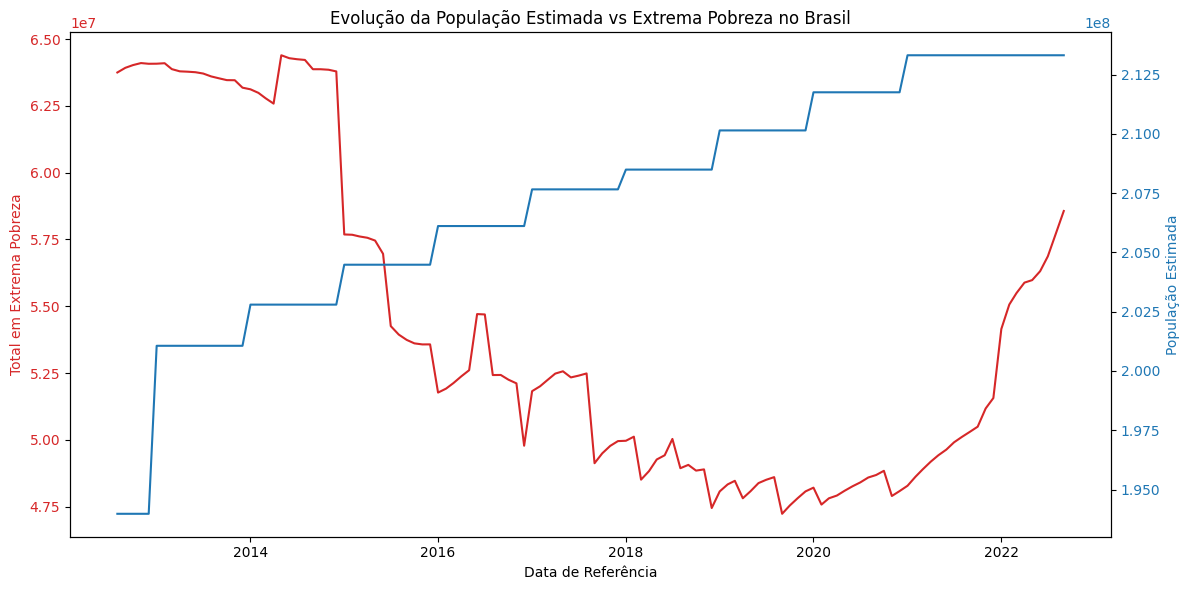

In [12]:
pdf = df_pobreza_ano_fianl.toPandas()

# Converter DATA_REFERENCIA para datetime
pdf["DATA_REFERENCIA"] = pd.to_datetime(pdf["DATA_REFERENCIA"], format="%m-%Y")

# Ordenar por data
pdf = pdf.sort_values("DATA_REFERENCIA")

# Criar figura
fig, ax1 = plt.subplots(figsize=(12,6))

# Eixo Y1 -> TOTAL (extrema pobreza)
ax1.plot(pdf["DATA_REFERENCIA"], pdf["TOTAL"], color="tab:red", label="Total em Extrema Pobreza")
ax1.set_xlabel("Data de Referência")
ax1.set_ylabel("Total em Extrema Pobreza", color="tab:red")
ax1.tick_params(axis="y", labelcolor="tab:red")

# Criar segundo eixo Y -> POPULACAO_ESTIMADA
ax2 = ax1.twinx()
ax2.plot(pdf["DATA_REFERENCIA"], pdf["POPULACAO_ESTIMADA"], color="tab:blue", label="População Estimada")
ax2.set_ylabel("População Estimada", color="tab:blue")
ax2.tick_params(axis="y", labelcolor="tab:blue")

# Título e layout
plt.title("Evolução da População Estimada vs Extrema Pobreza no Brasil")
fig.tight_layout()
plt.show()